**Working with Excel** 

In [1]:
# Importing the Pandas library
import pandas as pd

In [2]:
# Importing files 
df1 = pd.read_excel("Calgary.xlsx")
df2 = pd.read_excel("Montreal.xlsx")
df3 = pd.read_excel("Quebec.xlsx")
df4 = pd.read_excel("Toronto.xlsx")
df5 = pd.read_excel("Vancouver.xlsx")

In [3]:
# Joining the files
df = pd.concat([df1,df2,df3,df4,df5])

In [4]:
# First five lines
df.head()

,id,id_store,sold,date,amount,city
0,1,3,440.0,7/11/2021,379,Calgary
1,2,3,281.0,8/9/2020,356,Calgary
2,3,3,186.0,5/19/2019,393,Calgary
3,4,3,400.0,2/25/2021,366,Calgary
4,5,3,NaN,5/17/2019,279,Calgary


In [5]:
# Last five lines
df.tail()

,id,id_store,sold,date,amount,city
45,46,4,185.0,10/28/2019,564,Vancouver
46,47,4,343.0,5/3/2017,213,Vancouver
47,48,4,208.0,10/12/2016,234,Vancouver
48,49,4,449.0,9/26/2019,297,Vancouver
49,50,4,224.0,4/17/2020,361,Vancouver


In [6]:
# Showing results
df.sample(10)

,id,id_store,sold,date,amount,city
15,16,4,312.0,8/25/2018,207,Vancouver
19,20,2,215.0,9/15/2016,354,Montreal
44,45,4,293.0,9/26/2017,79,Vancouver
32,33,2,238.0,5/8/2021,255,Montreal
30,31,1,165.0,10/18/2016,430,Toronto
27,28,4,433.0,8/31/2017,439,Vancouver
7,8,2,571.0,9/1/2016,124,Montreal
43,44,5,331.0,4/9/2020,433,Quebec
31,32,4,279.0,6/5/2019,129,Vancouver
46,47,5,163.0,10/25/2020,266,Quebec


In [7]:
# Checking the data type
df.dtypes

id            int64
id_store      int64
sold        float64
date         object
amount        int64
city         object
dtype: object

In [8]:
# Changing the data type of the id_loja column
df["id_store"] = df["id_store"].astype("object")

In [9]:
df.head()

,id,id_store,sold,date,amount,city
0,1,3,440.0,7/11/2021,379,Calgary
1,2,3,281.0,8/9/2020,356,Calgary
2,3,3,186.0,5/19/2019,393,Calgary
3,4,3,400.0,2/25/2021,366,Calgary
4,5,3,NaN,5/17/2019,279,Calgary


In [10]:
# Querying lines with null values
df.isnull().sum()

id           0
id_store     0
sold        12
date         0
amount       0
city         0
dtype: int64

In [11]:
# Replacing null values ​​with the average
df["sold"].fillna(df["sold"].mean(), inplace=True)

In [12]:
# Querying lines with null values again
df.isnull().sum()

id          0
id_store    0
sold        0
date        0
amount      0
city        0
dtype: int64

In [13]:
# Calculating average of sales
df["sold"].mean()

294.8838383838384

In [14]:
# Replacing null values ​​with zero
df["sold"].fillna(0, inplace=True)

In [15]:
# Deleting lines with null values
df.dropna(inplace=True)

In [16]:
# Deleting lines with null values based in one column
df.dropna(subset=["sold"], inplace=True)

In [17]:
# Removing rows that have missing values ​​in all columns
df.dropna(how="all", inplace=True)

**Creating new columns**

In [18]:
# Creating the revenue column
df["revenue"] = df["sold"].mul(df["amount"])

In [19]:
# Showing the new column 
df.head()

,id,id_store,sold,date,amount,city,revenue
0,1,3,440.000000,7/11/2021,379,Calgary,166760.000000
1,2,3,281.000000,8/9/2020,356,Calgary,100036.000000
2,3,3,186.000000,5/19/2019,393,Calgary,73098.000000
3,4,3,400.000000,2/25/2021,366,Calgary,146400.000000
4,5,3,294.883838,5/17/2019,279,Calgary,82272.590909


In [20]:
# Division of revenue by sales
df["revenue/sold"] = df["revenue"] / df["sold"]

In [21]:
# Showing the new column 
df.head()

,id,id_store,sold,date,amount,city,revenue,revenue/sold
0,1,3,440.000000,7/11/2021,379,Calgary,166760.000000,379.0
1,2,3,281.000000,8/9/2020,356,Calgary,100036.000000,356.0
2,3,3,186.000000,5/19/2019,393,Calgary,73098.000000,393.0
3,4,3,400.000000,2/25/2021,366,Calgary,146400.000000,366.0
4,5,3,294.883838,5/17/2019,279,Calgary,82272.590909,279.0


In [22]:
# Showing the biggest revenue
df["revenue"].max()

319770.0

In [23]:
# Showing the smallest revenue
df["revenue"].min()

4488.0

In [24]:
# Return the top five revenues
df.nlargest(5, "revenue")

,id,id_store,sold,date,amount,city,revenue,revenue/sold
34,35,3,561.0,6/29/2021,570,Calgary,319770.0,570.0
34,35,2,566.0,1/15/2019,564,Montreal,319224.0,564.0
15,16,5,569.0,5/1/2017,539,Quebec,306691.0,539.0
11,12,3,559.0,3/22/2021,531,Calgary,296829.0,531.0
37,38,3,505.0,11/1/2018,524,Calgary,264620.0,524.0


In [25]:
# Return the lowest five revenues
df.nsmallest(5, "revenue")

,id,id_store,sold,date,amount,city,revenue,revenue/sold
22,23,5,88.0,7/26/2018,51,Quebec,4488.0,51.0
29,30,5,95.0,3/26/2017,72,Quebec,6840.0,72.0
30,31,5,111.0,8/31/2019,84,Quebec,9324.0,84.0
21,22,2,102.0,8/29/2018,104,Montreal,10608.0,104.0
43,44,4,76.0,5/8/2019,144,Vancouver,10944.0,144.0


In [26]:
# Grouping revenue by city
df.groupby("city")["revenue"].sum()

city
Calgary       4.672419e+06
Montreal      3.630713e+06
Quebec        4.800696e+06
Toronto       2.381455e+06
Vancouver     4.052734e+06
Name: revenue, dtype: float64

In [27]:
# Sorting data
df.sort_values("revenue", ascending=False).head(10)

,id,id_store,sold,date,amount,city,revenue,revenue/sold
34,35,3,561.0,6/29/2021,570,Calgary,319770.0,570.0
34,35,2,566.0,1/15/2019,564,Montreal,319224.0,564.0
15,16,5,569.0,5/1/2017,539,Quebec,306691.0,539.0
11,12,3,559.0,3/22/2021,531,Calgary,296829.0,531.0
37,38,3,505.0,11/1/2018,524,Calgary,264620.0,524.0
10,11,3,539.0,3/15/2018,489,Calgary,263571.0,489.0
32,33,3,506.0,6/29/2019,514,Calgary,260084.0,514.0
15,16,2,467.0,11/4/2017,546,Montreal,254982.0,546.0
41,42,5,573.0,1/14/2021,440,Quebec,252120.0,440.0
11,12,5,551.0,10/31/2018,455,Quebec,250705.0,455.0


**Working with dates**

In [28]:
# Transforming the date column into a date type
df["date"] = pd.to_datetime(df["date"])

In [29]:
# Checking the column type
df.dtypes

id                       int64
id_store                object
sold                   float64
date            datetime64[ns]
amount                   int64
city                    object
revenue                float64
revenue/sold           float64
dtype: object

In [30]:
# Transforming the date column into an integer type
df["date"] = df["date"].astype("int64")

In [31]:
# Checking the column type
df.dtypes

id                int64
id_store         object
sold            float64
date              int64
amount            int64
city             object
revenue         float64
revenue/sold    float64
dtype: object

In [32]:
# Transforming the date column into a date type
df["date"] = pd.to_datetime(df["date"])

In [33]:
# Grouping revenue by year
df.groupby(df["date"].dt.year)["revenue"].sum()

date
2016    3.717316e+06
2017    2.636029e+06
2018    2.983503e+06
2019    3.299451e+06
2020    3.235961e+06
2021    3.665758e+06
Name: revenue, dtype: float64

In [34]:
# Creating a new column with year
df["sales_year"] = df["date"].dt.year

In [35]:
# Showing the new column 
df.head()

,id,id_store,sold,date,amount,city,revenue,revenue/sold,sales_year
0,1,3,440.000000,2021-07-11,379,Calgary,166760.000000,379.0,2021
1,2,3,281.000000,2020-08-09,356,Calgary,100036.000000,356.0,2020
2,3,3,186.000000,2019-05-19,393,Calgary,73098.000000,393.0,2019
3,4,3,400.000000,2021-02-25,366,Calgary,146400.000000,366.0,2021
4,5,3,294.883838,2019-05-17,279,Calgary,82272.590909,279.0,2019


In [36]:
# Extracting the month and day of sale
df["sales_month"], df["sales_day"] = (df["date"].dt.month, df["date"].dt.day)

In [37]:
# Showing the new columns 
df.sample(5)

,id,id_store,sold,date,amount,city,revenue,revenue/sold,sales_year,sales_month,sales_day
5,6,2,294.883838,2018-12-10,57,Montreal,16808.378788,57.0,2018,12,10
29,30,3,140.000000,2019-07-21,559,Calgary,78260.000000,559.0,2019,7,21
39,40,5,264.000000,2016-02-03,354,Quebec,93456.000000,354.0,2016,2,3
2,3,4,224.000000,2019-01-13,237,Vancouver,53088.000000,237.0,2019,1,13
1,2,5,487.000000,2016-05-08,141,Quebec,68667.000000,141.0,2016,5,8


In [38]:
# Returning the oldest date
df["date"].min()

Timestamp('2016-02-03 00:00:00')

In [39]:
# Calculating the difference in days
df["difference_days"] = df["date"] - df["date"].min()

In [40]:
# Showing the difference
df.sample(5)

,id,id_store,sold,date,amount,city,revenue,revenue/sold,sales_year,sales_month,sales_day,difference_days
34,35,3,561.0,2021-06-29,570,Calgary,319770.0,570.0,2021,6,29,1973 days
9,10,5,443.0,2020-04-28,362,Quebec,160366.0,362.0,2020,4,28,1546 days
12,13,5,218.0,2019-09-13,211,Quebec,45998.0,211.0,2019,9,13,1318 days
41,42,5,573.0,2021-01-14,440,Quebec,252120.0,440.0,2021,1,14,1807 days
18,19,4,301.0,2018-06-07,195,Vancouver,58695.0,195.0,2018,6,7,855 days


In [41]:
# Creating the first sales quarter column 
df["sales_quarter"] = df["date"].dt.quarter

In [42]:
# Showing the sales quarter column
df.sample(5)

,id,id_store,sold,date,amount,city,revenue,revenue/sold,sales_year,sales_month,sales_day,difference_days,sales_quarter
14,15,2,209.000000,2017-08-07,332,Montreal,69388.000000,332.0,2017,8,7,551 days,3
25,26,2,294.883838,2020-10-25,82,Montreal,24180.474747,82.0,2020,10,25,1726 days,4
12,13,5,218.000000,2019-09-13,211,Quebec,45998.000000,211.0,2019,9,13,1318 days,3
40,41,3,260.000000,2021-05-26,543,Calgary,141180.000000,543.0,2021,5,26,1939 days,2
34,35,2,566.000000,2019-01-15,564,Montreal,319224.000000,564.0,2019,1,15,1077 days,1


In [43]:
# Filtering march 2020 sales
sales_march = df.loc[(df["date"].dt.year == 2020) & (df["date"].dt.month == 3)]

In [44]:
# Showing march 2020 sales
sales_march

,id,id_store,sold,date,amount,city,revenue,revenue/sold,sales_year,sales_month,sales_day,difference_days,sales_quarter
17,18,2,477.000000,2020-03-28,385,Montreal,183645.000000,385.0,2020,3,28,1515 days,1
20,21,5,294.883838,2020-03-08,521,Quebec,153634.479798,521.0,2020,3,8,1495 days,1
34,35,5,222.000000,2020-03-14,458,Quebec,101676.000000,458.0,2020,3,14,1501 days,1
7,8,4,228.000000,2020-03-24,282,Vancouver,64296.000000,282.0,2020,3,24,1511 days,1


**Data visualization**

In [45]:
# Counting the number of sales in each store
df["id_store"].value_counts(ascending=False)

4    50
5    49
3    42
2    38
1    31
Name: id_store, dtype: int64

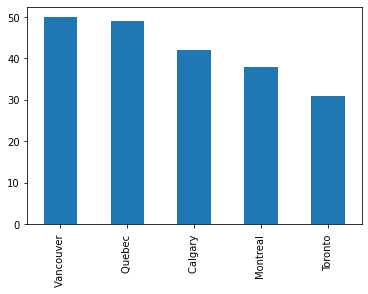

In [46]:
# Plotting a bar chart 
df["city"].value_counts(ascending=False).plot.bar()

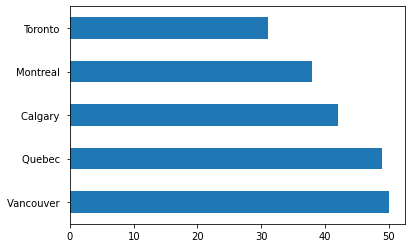

In [47]:
# Plotting a horizontal bar chart
df["city"].value_counts().plot.barh()

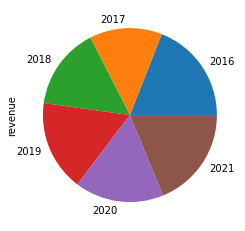

In [48]:
# Plotting a pie chart of revenue by year
df.groupby(df["date"].dt.year)["revenue"].sum().plot.pie()

In [49]:
# Amount sales by city
df["city"].value_counts()

Vancouver     50
Quebec        49
Calgary       42
Montreal      38
Toronto       31
Name: city, dtype: int64

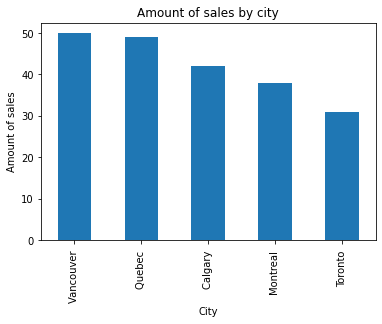

In [50]:
# Adding title and changing axis names
import matplotlib.pylab as plt
df["city"].value_counts().plot.bar(title="Amount of sales by city")
plt.xlabel("City")
plt.ylabel("Amount of sales");

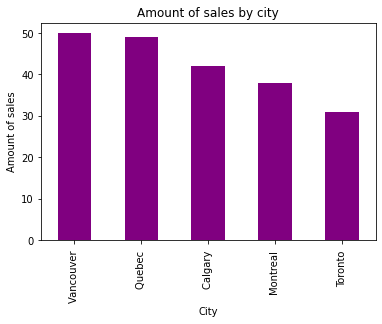

In [51]:
# Changing the color
df["city"].value_counts().plot.bar(title="Amount of sales by city", color="purple")
plt.xlabel("City")
plt.ylabel("Amount of sales");

In [52]:
# Changing the style
plt.style.use("ggplot")

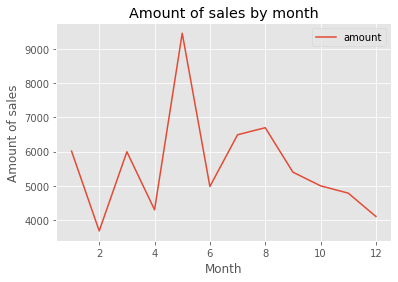

In [53]:
# Plotting amount of sales by month
df.groupby(df["sales_month"])["amount"].sum().plot(title="Amount of sales by month")
plt.xlabel("Month")
plt.ylabel("Amount of sales");
plt.legend()

In [54]:
# Selecting sales
df_2020 = df[df["sales_year"] == 2020]

In [55]:
# Amount of sales by month 
df_2020.groupby(df_2020["sales_month"])["amount"].sum()


sales_month
1      997
2     1626
3     1646
4     3016
5      402
8     1270
9     1856
10     519
11    1272
12     453
Name: amount, dtype: int64

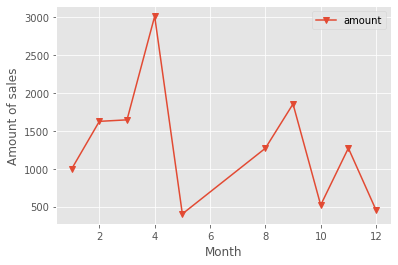

In [56]:
# Amount sold by month on 2020
df_2020.groupby(df_2020["sales_month"])["amount"].sum().plot(marker = "v")
plt.xlabel("Month")
plt.ylabel("Amount of sales");
plt.legend()

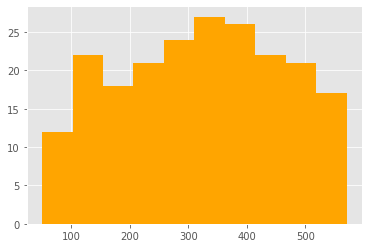

In [57]:
# Plotting a histogram
plt.hist(df["amount"], color="orange");

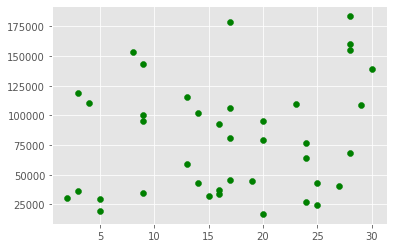

In [58]:
#
plt.scatter(x=df_2020["sales_day"], y = df_2020["revenue"], color ="green");

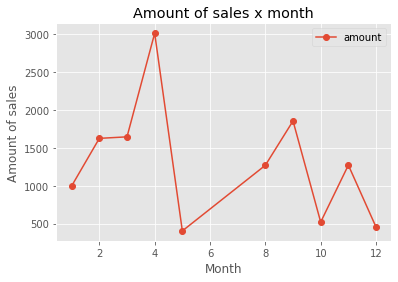

In [59]:
# Saving in png
df_2020.groupby(df_2020["sales_month"])["amount"].sum().plot(marker="o")
plt.title("Amount of sales x month")
plt.xlabel("Month")
plt.ylabel("Amount of sales");
plt.legend()
plt.savefig("Chart amount x month.png")